In [2]:
# 05_posterior_analysis.ipynb

import pymc as pm
import arviz as az
import matplotlib.pyplot as plt

# Load the trace (assuming you saved it in notebook 04)
trace = az.from_netcdf("../models/match_outcome_model_trace.nc")

# Optional: Load the model again if needed (only if not kept in memory)
# with open("../models/match_outcome_model.pkl", "rb") as f:
#     model = pickle.load(f)


In [3]:
# Summary of posterior distributions
summary = az.summary(trace, hdi_prob=0.95)
print(summary)


            mean     sd  hdi_2.5%  hdi_97.5%  mcse_mean  mcse_sd  ess_bulk  \
intercept -0.381  0.256    -0.879      0.119      0.003    0.003    8061.0   
beta       0.692  1.965    -3.097      4.559      0.022    0.022    7778.0   

           ess_tail  r_hat  
intercept    5667.0    1.0  
beta         5496.0    1.0  


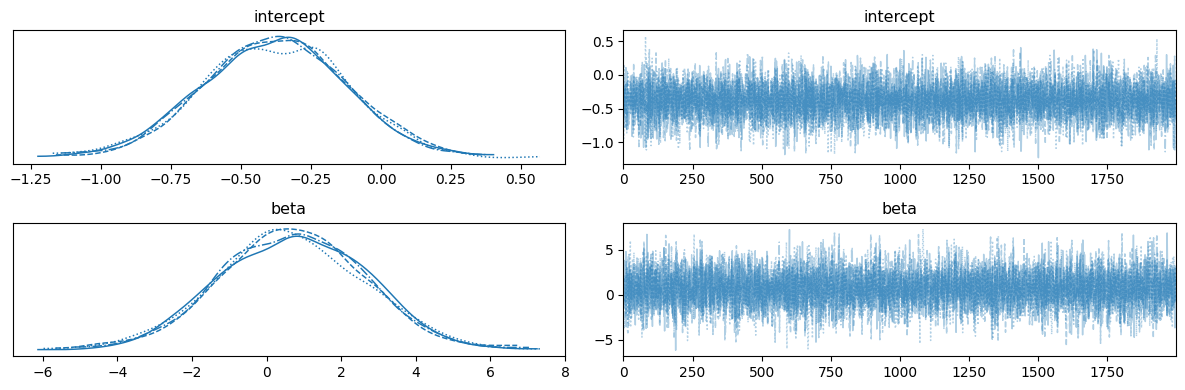

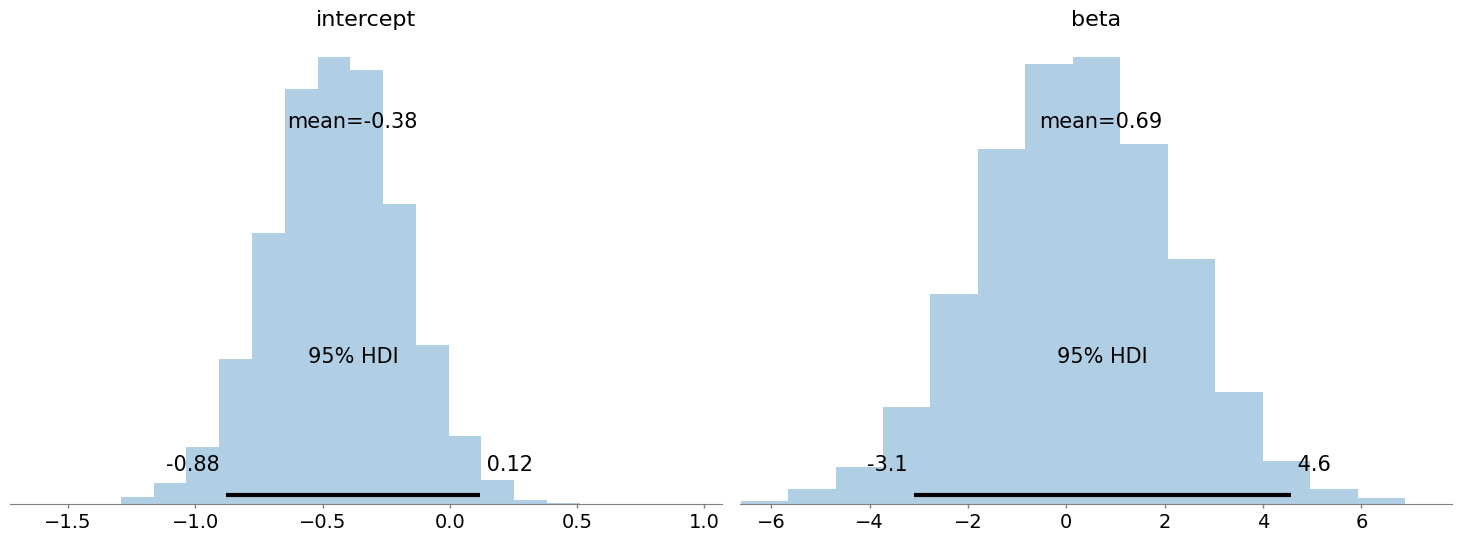

In [4]:
# Trace and density plots
az.plot_trace(trace)
plt.tight_layout()
plt.show()

# Posterior distribution
az.plot_posterior(trace, kind="hist", hdi_prob=0.95)
plt.tight_layout()
plt.show()


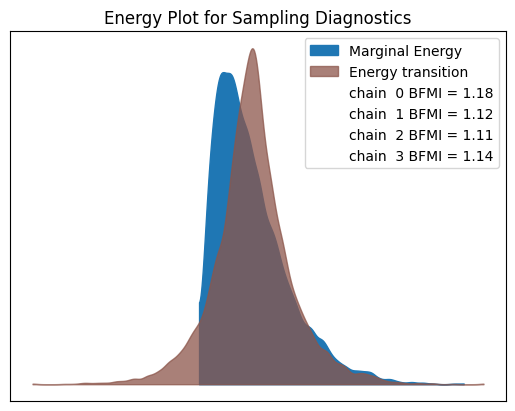

<xarray.Dataset> Size: 16B
Dimensions:    ()
Data variables:
    intercept  float64 8B 1.001
    beta       float64 8B 1.0
<xarray.Dataset> Size: 16B
Dimensions:    ()
Data variables:
    intercept  float64 8B 8.061e+03
    beta       float64 8B 7.778e+03


In [5]:
# Check for convergence issues
az.plot_energy(trace)
plt.title("Energy Plot for Sampling Diagnostics")
plt.show()

# r_hat and ESS values
print(az.rhat(trace))
print(az.ess(trace))


In [6]:
pp_trace = az.from_netcdf("../models/match_outcome_post_pred.nc")

# Visualize predictive distribution
az.plot_ppc(pp_trace, group="posterior_predictive", num_pp_samples=100)
plt.show()


FileNotFoundError: [Errno 2] Unable to synchronously open file (unable to open file: name = '../models/match_outcome_post_pred.nc', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)